# Eρμηνεία του μοντέλου

Η άσκηση αυτή επικεντρώνεται στην ερμηνεία του μοντέλου. Στο πλαίσιο αυτό, η ερμηνεία του μοντέλου σημαίνει η συμβολή των επιμέρους χαρακτηριστικών στο αποτέλεσμα της πρόβλεψης. 

 Επιπλέον υλικό:

- https://machinelearningmastery.com/calculate-feature-importance-with-python/

- https://realpython.com/linear-regression-in-python/

- https://pythonprogramming.net/regression-introduction-machine-learning-tutorial/

- https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

- https://christophm.github.io/interpretable-ml-book/

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold, train_test_split

## Προετοιμασία των δεδομένων

Χρησιμοποιούμε ξανά το σύνολο των δεδομένων ποιότητας κρασιού. Ως συνήθως, προσπαθούμε να προβλέψουμε την ποιότητα του κρασιού από μερικές μετρικές κρασιού, π.χ. υπολειμματική ζάχαρη, κιτρικό οξύ, κλπ. Αυτή τη φορά, ωστόσο, ο τελικός στόχος είναι να κατανοήσουμε ποια από τα χαρακτηριστικά είναι σημαντικά για το αποτέλεσμα της πρόβλεψης.

In [7]:
# Εισαγωγή δεδομένων 
df_wine = pd.read_csv('winequality-white.csv', sep=";", header=0)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
##from google.colab import drive
##drive.mount('/content/drive')

In [9]:
#Κάντε uncomment 
#from google.colab import drive
#drive.mount('/gdrive')

In [10]:
#df_wine = pd.read_csv('/gdrive/My Drive/Colab Notebooks/winequality-white.csv', sep=";", header=0)
#df_wine

In [11]:
# κενές τιμές
df_wine.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
# προετοιμασία χαρακτηριστικών και target
X = df_wine.drop(columns='quality')
y = df_wine.quality
y = y.values.reshape(-1, 1)

Δεδομένου ότι εργαστήκαμε ήδη σε αυτά τα δεδομένα κρατάμε το μέρος πρόβλεψης απλό. 
Ωστόσο, βεβαιωθείτε ότι έχετε κατανοήσει τον κώδικα και συμβουλευτείτε τις προηγούμενες ασκήσεις, αν κάτι δεν σας είναι σαφές! 

In [13]:
# 1. Split data σε training και test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
# Δημιουργία του  Regressor 
lin_regr = LinearRegression()
# 2. Fitting του Regression
lin_regr.fit(X_train, y_train)
# 3. Test τον regressor με τα test data και με τα  training για σύγκριση
y_pred_test = lin_regr.predict(X_test)
y_pred_train = lin_regr.predict(X_train)
# 4. υπολογισμός μετρικών (π.χ. r2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
# Έχουμε τώρα τις προβλέψεις μας και τη συνολική απόδοση του μοντέλου μας
print('Predictions: ', y_pred_test)
print('Test performance: ', r2_test)
print('Train performance: ', r2_train)

Predictions:  [[5.5912529 ]
 [5.4637415 ]
 [6.09168743]
 ...
 [6.44740715]
 [5.8809231 ]
 [4.89256558]]
Test performance:  0.24380039034360979
Train performance:  0.2916761840002091


Όπως ήταν αναμενόμενο, η απόδοση στο test set είναι χαμηλότερη από την απόδοση στο training set.

## Επιθεώρηση του μοντέλου

## Γραμμική παλινδρόμηση

Θυμηθείτε η γραμμική παλινδρόμηση ταιριάζει ένα γραμμικό μοντέλο με συντελεστές/coeffiecients w = (w1, ..., wp) για την ελαχιστοποίηση του αθροίσματος των τετραγώνων μεταξύ των παρατηρούμενων μεταβλητών-στόχων στο σύνολο δεδομένων και των στόχων που προβλέπονται από τη γραμμική προσέγγιση.

Μπορούμε να έχουμε πρόσβαση στα coeffiecients χρησιμοποιώντας .coef_ στην γραμμική παλινδρόμηση μας. 


In [14]:
# Ποια είναι τα coefficients?
coef = lin_regr.coef_
print(coef)

[[ 1.15953365e-01 -1.81594265e+00 -1.66810488e-02  9.65149311e-02
  -5.13583573e-01  4.74413246e-03 -2.17957734e-04 -1.98333673e+02
   8.79948572e-01  6.27189921e-01  1.31644131e-01]]


In [15]:
# Tα coefficients επιστρέφονται ως numpy array. 
#Θα μετατρέψουμε αυτό το array σε λίστα για να οπτικοποιήσουμε τα coefficients. 
print(type(coef))
coef = coef.tolist()[0] # μετατροπή σε .tolist()
print(type(coef))
print(coef)

<class 'numpy.ndarray'>
<class 'list'>
[0.11595336528373085, -1.8159426509738594, -0.016681048845222667, 0.09651493113232865, -0.5135835725746709, 0.004744132457673245, -0.0002179577341205885, -198.3336732827694, 0.8799485721205835, 0.627189921170813, 0.13164413133074548]


In [16]:
# Πάρτε τις ετικέτες για τα χαρακτηριστικά ως λίστα. 
# Επιστρέφει μια λίστα των χαρακτηριστικών εκτός από το target (quality)
labels = df_wine.columns.values[:-1].tolist()
print(labels)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


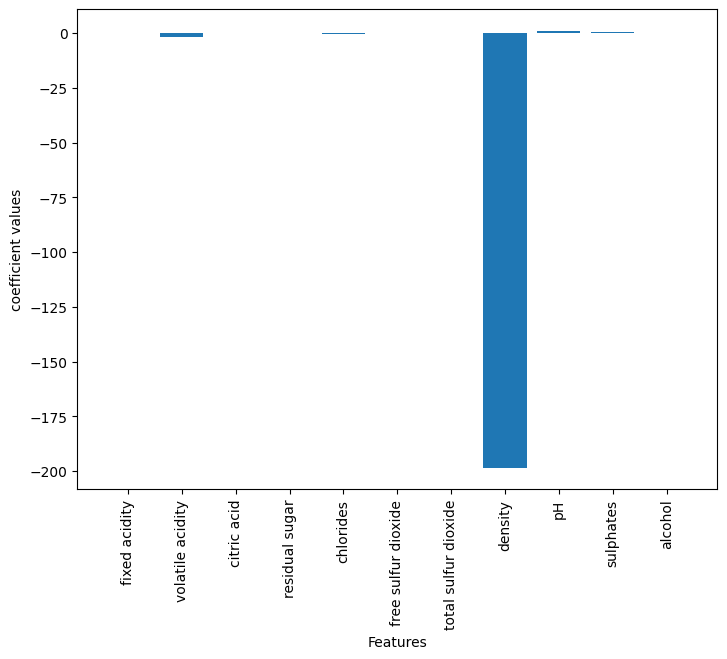

In [17]:
# Plot τα coefficients για κάθε feature
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.xticks(rotation=90)
ax.bar(labels, coef)
plt.xlabel('Features')
plt.ylabel('coefficient values')
plt.show()

Ας ρίξουμε μια ματιά στους συντελεστές μας. Ποιος είναι ο πιο σημαντικός;
Λοιπόν, σε αυτό το σημείο δεν μπορούμε πραγματικά να πούμε. Το πρόβλημα είναι οι διαφορετικές κλίμακες των χαρακτηριστικών μας. Ας ρίξουμε άλλη μια ματιά στις τιμές των δεδομένων μας.

In [18]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


Οι γραμμικοί αλγόριθμοι μηχανικής εκμάθησης ταιριάζουν/fit σε ένα μοντέλο στο οποίο η πρόβλεψη είναι το σταθμισμένο άθροισμα των τιμών εισόδου .

Αυτοί οι αλγόριθμοι βρίσκουν ένα σύνολο συντελεστών που θα χρησιμοποιηθούν στο σταθμισμένο άθροισμα για να κάνουν μια πρόβλεψη. Αυτοί οι συντελεστές μπορούν να χρησιμοποιηθούν άμεσα ως βαθμολογία σπουδαιότητας χαρακτηριστικών (feature importance score). Ωστόσο, υπάρχει ένα πρόβλημα. Τα βάρη εξαρτώνται από την κλίμακα της μεταβλητής εισόδου. Τα βάρη είναι μικρά εάν οι τιμές μιας μεταβλητής είναι μεγάλες και αντίστροφα. Ένας τρόπος αντιμετώπισης αυτού του προβλήματος είναι το standardization.


**Μικρή επανάληψη του standardization:** 

Το standardization είναι η διαδικασία τοποθέτησης διαφορετικών μεταβλητών στην ίδια κλίμακα. Αυτή η διαδικασία σάς επιτρέπει να συγκρίνετε βαθμολογίες μεταξύ διαφορετικών τύπων μεταβλητών. Συνήθως, για να τυποποιήσετε μεταβλητές, υπολογίζετε τη μέση και τυπική απόκλιση για μια μεταβλητή. Στη συνέχεια, για κάθε παρατηρούμενη τιμή της μεταβλητής, αφαιρείτε τη μέση τιμή και διαιρείτε με την τυπική απόκλιση.

Μέσα στο **Scikit learn** μπορούμε να χρησιμοποιήσουμε το StandardScaler.

In [19]:
# Είσοδος του standardizer package
from sklearn.preprocessing import StandardScaler
# Διαχωρισμός σε training και test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
#############################################################################
# Εδώ είναι το StandardScaler application
# Standardize data using StandardScaler - 
# Create and fit StandardScaler
scaler_features = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_train)
scaler_targets = StandardScaler(copy=True, with_mean=True, with_std=True).fit(y_train)
# Transform the data
X_train = scaler_features.transform(X_train)
y_train = scaler_targets.transform(y_train)
X_test = scaler_features.transform(X_test)
y_test = scaler_targets.transform(y_test)
#############################################################################
# Από εδώ και στο εξής κάνουμε τα συνηθισμένα βήματα 
# Δημιουργία του Regressor 
lin_regr = LinearRegression()
# Fitting του Regression
lin_regr.fit(X_train, y_train)
# Test regressor 
y_pred_test = lin_regr.predict(X_test)
y_pred_train = lin_regr.predict(X_train)
# υπολογισμός μετρικών (π.χ. r2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
# Παίρνουμε τα coefficients 
coef = lin_regr.coef_.tolist()[0]

In [20]:
# Το μοντέλο μας αποδίδει εξίσου καλά
print(r2_test)
print(r2_train)

0.24380039034361067
0.29167618400020867


In [21]:
# Ας δούμε τα coefficients
print(coef)

[0.10941402566309337, -0.20852613199671235, -0.0022724468414602045, 0.5511611672163437, -0.012982560086368616, 0.09175746502552021, -0.010510238971853068, -0.6651319646990241, 0.15155387595843098, 0.08332294354747853, 0.18513486257579212]


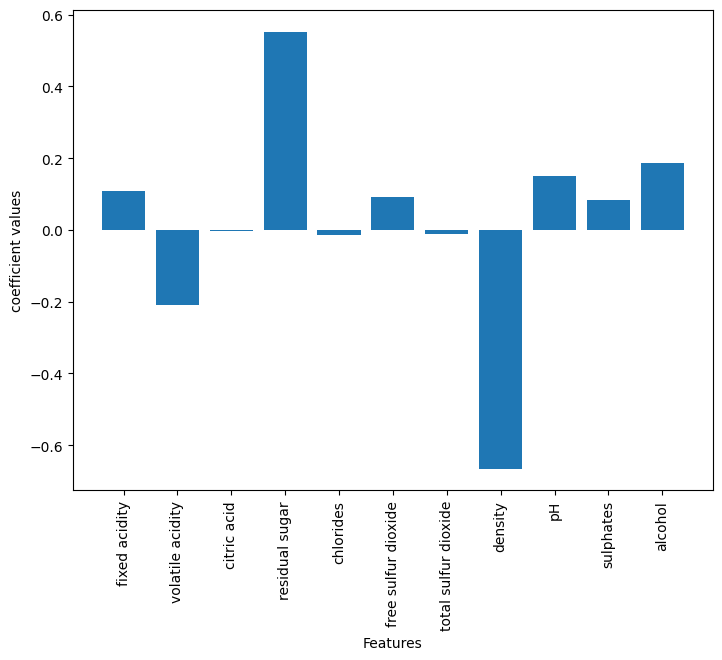

In [22]:
# Δημιουργία της ίδιας γραφικής παράστασης όπως και πριν
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(labels,coef)
plt.xlabel('Features')
plt.ylabel('coefficient values')
plt.show()

Τώρα που τα χαρακτηριστικά είναι στην ίδια κλίμακα μπορούμε να συγκρίνουμε τους συντελεστές. 

Ωστόσο, δεδομένου ότι τους τυποποιήσαμε με το standardition, η συνήθης ερμηνεία των βαρών δεν είναι πλέον αλήθινή. Συνήθως, οι συντελεστές υποδεικνύουν την αύξηση/μείωση κατά μήκος του άξονα y για κάθε μονάδα αύξησης κατά μήκος του άξονα x. 
Για να μπορέσουμε να ερμηνεύσουμε τους συντελεστές με αυτόν τον τρόπο και πάλι πρέπει να **αντιστρέψουμε** τον μετασχηματισμό που κάναμε.


In [47]:
# αντίστροφος μετασχηματισμός συντελεστών. 

coef_reshaped = np.array(coef).reshape(1, -1)
coef_retransformed = scaler_features.inverse_transform(coef_reshaped)
print(coef_retransformed)

[[6.94963192e+00 2.57598095e-01 3.32737615e-01 9.09231218e+00
  4.55800378e-02 3.68579049e+01 1.38085478e+02 9.92044231e-01
  3.21094012e+00 5.00013435e-01 1.07487563e+01]]


Συνοψίζοντας: πρέπει να τυποποιήσουμε/standardize τα χαρακτηριστικά μας πριν τα βάλουμε στο μοντέλο γραμμικής παλινδρόμησης. Αυτό μας επιτρέπει να συγκρίνουμε τη σημασία τους μεταξύ τους. 
Προκειμένου να ερμηνεύσουμε την επίδρασή τους στη μεταβλητή στόχο μας με το συνηθισμένο τρόπο πρέπει να αντιστρέψουμε τον εφαρμοζόμενο μετασχηματισμό που κάναμε για να πάρουμε πίσω το βάρος στην κλίμακα των αρχικών δεδομένων.  

## Decision Trees 

Όταν επιθεωρούμε ένα γραμμικό μοντέλο παλινδρόμησης, εξετάζουμε από κοντά τους συντελεστές για να κατανοήσουμε τα χαρακτηριστικά μας και την σημασία τους. 
Σε μεθόδους που βασίζονται σε δέντρα δεν υπάρχουν συντελεστές όπως αυτοί στη γραμμική παλινδρόμηση. Ωστόσο, μπορούμε να επιθεωρήσουμε τη σημασία των χαρακτηριστικών μας, όπως μετράται από τη συμβολή τους στη μείωση σφαλμάτων.
Η σημασία ενός χαρακτηριστικού υπολογίζεται ως η (κανονικοποιημένη) συνολική μείωση του κριτηρίου που αποφέρει αυτή αυτό το χαρακτηριστικό, π.χ. πόσο μειώνεται το MSE κατά ένα συγκεκριμένο χαρακτηριστικό. 

In [25]:
# Σημείωση: Δεν θα χρειαστεί να ξανακάνουμε το standarization δεδομένου ότι τα δεδομένα είναι ακόμα τυποποιημένα.
# Ωστόσο, το αφήσαμε μέσα ώστε να μπορείτε να κάνετε εναλλαγή μεταξύ τυποποιημένων / μη τυποποιημένων.
# δοκιμάστε το και με τους δύο τρόπους και παρατηρήστε τι συμβαίνει!

# Προετοιμασία features και target - προετοιμασμένα για επαναφόρτωση των δεδομένων / διερεύνηση του standarization
X = df_wine.drop(columns='quality')
y = df_wine.quality.values.reshape(-1, 1)
# Split σε training και test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
# Create and fit StandardScaler
scaler_features = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_train)
# Transform the data
X_train = scaler_features.transform(X_train)
X_test = scaler_features.transform(X_test)
# Δημιουργία του Regressor, με max_depth=6
dec_tree = DecisionTreeRegressor(max_depth=6)
# Fitting το Decision tree
dec_tree.fit(X_train, y_train)
# Test τον Decision tree με τα test data (και τα training data για να τα συγκρίνουμε)
y_pred_test = dec_tree.predict(X_test)
y_pred_train = dec_tree.predict(X_train)
# Yπολογισμός μετρικών (π.χ. r2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

In [ ]:
print(r2_test)
print(r2_train)

In [36]:
# Η σημασία των χαρακτηριστικών υπολογίζεται αυτόματα κατά την εκπαίδευση του DT και αποθηκεύεται στη μεταβλητή feature_importance_
print(dec_tree.feature_importances_)

[0.01735234 0.20919151 0.01684266 0.04150049 0.02153635 0.11687143
 0.00391773 0.01232834 0.04209877 0.03379869 0.4845617 ]


In [37]:
# Μετατροπή features importance σε list
feat_imp = dec_tree.feature_importances_.tolist()
print(feat_imp)

[0.01735233788156423, 0.20919150588596358, 0.016842657389061225, 0.041500493659905754, 0.02153635390563991, 0.11687142820390498, 0.003917726810151947, 0.012328342154703022, 0.042098767238558606, 0.033798688799714226, 0.4845616980708326]


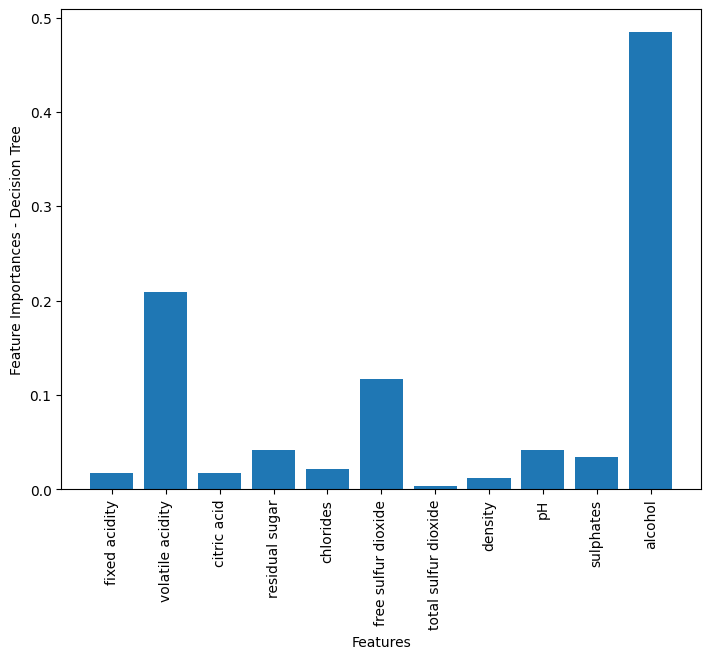

In [38]:
# Δημιουργήστε την ίδια γραφική παράσταση όπως και για στο γραμμικό μοντέλο
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.xticks(rotation=90)
ax.bar(labels,feat_imp)
plt.xlabel('Features')
plt.ylabel('Feature Importances - Decision Tree')
plt.show()

Εδώ βλέπουμε τις συνεισφορές κάθε χαρακτηριστικού στη γενική μείωση MSE του δέντρου απόφασης. Τα αποτελέσματα δεν είναι τα ίδια όπως στη γραμμική παλινδρόμηση. Τα χαρακτηριστικά έχουν άλλη σημασία. Αυτό είναι λογικό, δεδομένου ότι η απόδοση των δύο μεθόδων δεν είναι η ίδια επίσης.

Μια ακόμη σημείωση είναι η τυποποίηση σε μεθόδους που βασίζονται σε δέντρα:
Οι αλγόριθμοι που βασίζονται σε δέντρα είναι αρκετά αναίσθητοι στην κλίμακα των δυνατοτήτων. Σκεφτείτε το, ένα δέντρο αποφάσεων διαιρεί μόνο έναν κόμβο βασισμένο σε ένα ενιαίο χαρακτηριστικό γνώρισμα. Το δέντρο απόφασης διαιρεί έναν κόμβο σε ένα χαρακτηριστικό που αυξάνει την ομοιογένεια του κόμβου/μειώνει το σφάλμα. Αυτή η διαίρεση σε ένα χαρακτηριστικό δεν επηρεάζεται από άλλα χαρακτηριστικά.

Εξερευνήστε αυτή τη συμπεριφορά στο παραπάνω παράδειγμα με  comment/uncomment τις γραμμές κώδικα που υλοποιεί την τυποποίηση ! :)

Ας συνεχίσουμε με το τυχαίο δάσος που μοιάζει με  το δέντρο αποφάσεων. 

## Random Forest

In [39]:
# Split σε training και test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
# Create and fit StandardScaler
scaler_features = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_train)
scaler_targets = StandardScaler(copy=True, with_mean=True, with_std=True).fit(y_train)
# Transform the data
X_train = scaler_features.transform(X_train)
y_train = np.ravel(scaler_targets.transform(y_train))
X_test = scaler_features.transform(X_test)
y_test = np.ravel(scaler_targets.transform(y_test))
# Δημιουργία του Regressor, με λίγα n_estimators για να  μην πάρει πολύ χρόνο
rf_regr = RandomForestRegressor(n_estimators=50)
# Fitting το RF
rf_regr.fit(X_train, y_train)
# Test το RF με test data (και τα training data για να τα συγκρίνουμε)
y_pred_test = rf_regr.predict(X_test)
y_pred_train = rf_regr.predict(X_train)
# Yπολογισμός μετρικών (π.χ. r2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

In [40]:
print(r2_test)
print(r2_train)

0.43852347625303556
0.9320504708071663


In [41]:
# Η σημασία των χαρακτηριστικών υπολογίζεται αυτόματα κατά την εκπαίδευση του DT και αποθηκεύεται στη μεταβλητή feature_importance_
rf_feat_imp = rf_regr.feature_importances_.tolist()
print(rf_feat_imp)

[0.05806680417790654, 0.1273160134909288, 0.0586374652844005, 0.06922554833746673, 0.06369002403426599, 0.11454977910821688, 0.06693448621951473, 0.05606673436162509, 0.07280510101622312, 0.06343892680281144, 0.24926911716664032]


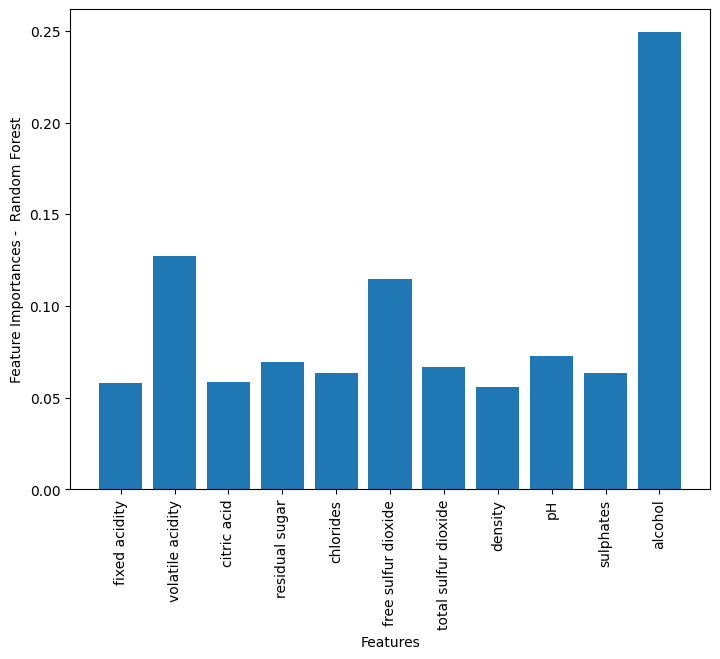

In [42]:
# Το ίδιο γράφημα με πριν
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(labels,rf_feat_imp)
plt.xlabel('Features')
plt.ylabel('Feature Importances -  Random Forest')
plt.show()

# Συγχαρητήρια!

Επεκτείνατε τις γνώσεις σας από την προηγούμενη εβδομάδα. Τώρα ξέρετε πώς να αξιολογήσετε ένα μοντέλο σχετικά με ποιο χαρακτηριστικό γνώρισμα είναι σημαντικό για τις προβλέψεις.

# Άσκηση

Τώρα θα ξαναδούμε το σύνολο δεδομένων California housing dataset . Γνωρίζουμε ήδη πώς να προβλέψουμε τις τιμές, αλλά δεν γνωρίζουμε ακόμα ποιες είναι οι σημαντικές μεταβλητές για να γίνει αυτό. 

Εισαγάγετε το σετ κατοικιών της California. Κάντε όλα τα συνήθη βήματα της προετοιμασίας των δεδομένων και το training και testing. Δεν χρειάζεται να ανησυχείτε για το cross-validation (χρησιμοποιήστε ένα train-test split όπως κάναμε σε αυτές τις ασκήσεις). Αντ'αυτού πάρτε το χρόνο σας και εξερευνήστε τις συνεισφορές των χαρακτηριστικών χρησιμοποιώντας τη γραμμική παλινδρόμηση, τα δέντρα απόφασης και τα τυχαία δάση.  

In [43]:
# Import 
from sklearn.datasets import fetch_california_housing
california_set = fetch_california_housing()